In [65]:
import pandas as pd
import numpy as np
import collections
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
%%javascript
(function(on) {
const e=$( "<a>Setup failed</a>" );
const ns="js_jupyter_suppress_warnings";
var cssrules=$("#"+ns);
if(!cssrules.length) cssrules = $("<style id='"+ns+"' type='text/css'>div.output_stderr { } </style>").appendTo("head");
e.click(function() {
    var s='Showing';  
    cssrules.empty()
    if(on) {
        s='Hiding';
        cssrules.append("div.output_stderr, div[data-mime-type*='.stderr'] { display:none; }");
    }
    e.text(s+' warnings (click to toggle)');
    on=!on;
}).click();
$(element).append(e);
})(true);

<IPython.core.display.Javascript object>

Projekt przygotowali: 

Mateusz Mulka i Mateusz Filas

In [3]:
df = pd.read_csv('data.csv')

Zmienne objaśniające, na których oparto badanie to:
- **Gender** - płeć
- **Age** - wiek
- **Debt** - dług
- **Married** - status małżeński
- **BankCustomer** - klient banku
- **Industry** - miejsce zatrudnienia
- **Ethnicity** - pochodzenie etniczne
- **YearsEmployed** - lata zatrudnienia
- **PriorDefault** - wcześniejsze zadłużenia
- **Employed** - status zatrudnienia
- **CreditScore** - zdolność kredytowa
- **DriversLicence** - posiadanie prawa jazdy
- **Citizen** - sposób nabycia obywatelstwa
- **ZipCode** - kod pocztowy
- **Income** - dochód 

Zmienną objaśnianą jest **Approved**, czyli zatwierdzenie, zgoda na posiadanie karty kredytowej.

In [4]:
df.shape

(690, 16)

Zbiór zawiera 690 obserwacji, a zmienne zlokalizowano w 16 kolumnach

In [5]:
df.dtypes

Gender              int64
Age               float64
Debt              float64
Married             int64
BankCustomer        int64
Industry           object
Ethnicity          object
YearsEmployed     float64
PriorDefault        int64
Employed            int64
CreditScore         int64
DriversLicense      int64
Citizen            object
ZipCode             int64
Income              int64
Approved            int64
dtype: object

Jak widać, w ramce danych występują 3 typy danych. Oprócz zmiennych liczbowych mamy do czynienia z 3 zmiennymi kategorycznymi:
- industry
- ethnicity
- citizen

In [6]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


Przyjżyjmy się bliżej naszym zmiennym kategorycznym.

- `Citizen`:

<AxesSubplot: >

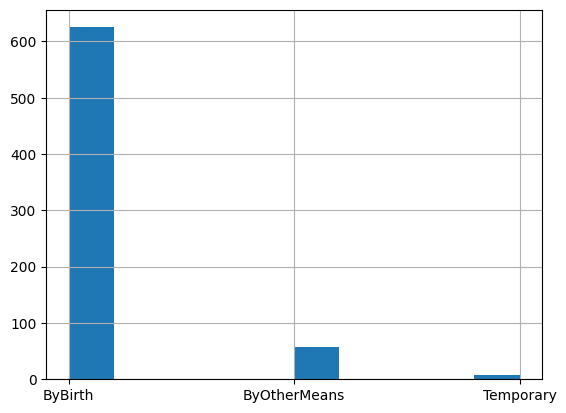

In [7]:
df['Citizen'].hist()

Jak widać, jeśli chodzi o zmienną `Citizen` dane nie są zbilansowane, dlatego wartości *ByOtherMeans* oraz *Temporary* zostaną połączone i będą stanowiły wartość $0$, a *ByBirth* zmieni się na $1$. Dzięki temu łatwiej będzie działać na zbiorze danych.

In [8]:
df2 = df.replace(['ByBirth', 'ByOtherMeans', 'Temporary'], [1, 0, 0])
df2.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,1,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,1,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,1,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,1,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,0,120,0,1


- `Ethnicity`:

<AxesSubplot: >

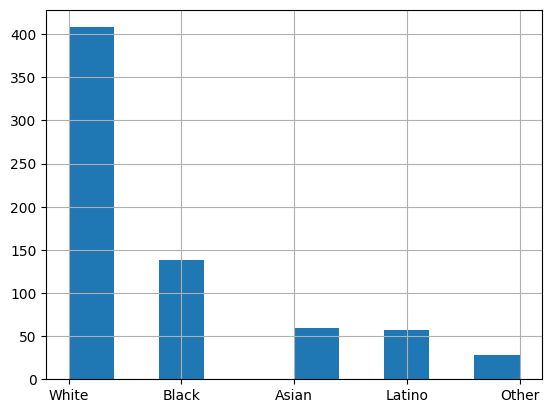

In [9]:
df2['Ethnicity'].hist()

W tym przypadku, aby chociaż troche zbilansować dane dotyczące etniczności, wartości 'Asian' oraz 'Latino' zostaną przeniesione do 'Others'.

<AxesSubplot: >

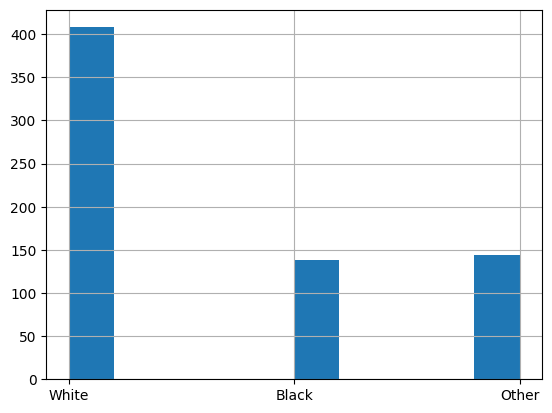

In [10]:
df3 = df2.replace(['Asian', 'Latino'], ['Other', 'Other'])
df3['Ethnicity'].hist()

- `Industry`:

<AxesSubplot: >

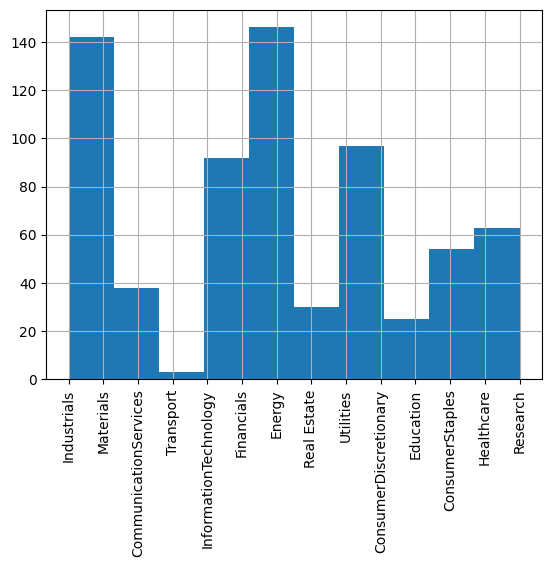

In [11]:
df3['Industry'].hist(xrot=90)

Z racji na bardzo rzadko występującą wartość 'Transport' wszystkie wiersze, w których występuje zostaną usunięte.

In [12]:
df3.drop(df3.loc[df3['Industry']=='Transport'].index, inplace=True)

Poniższy histogram przedstawia zbalansowanie zmiennej objaśnianej (`Approved`) w zbiorze.

<AxesSubplot: >

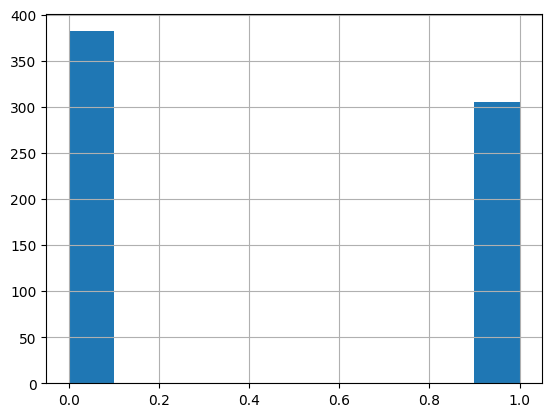

In [13]:
df3['Approved'].hist()

Poniżej można zobaczyć jak zmienne objaśniające skorelowane są ze zmienną objaśnianą.

In [66]:
correlationMatrix = df3.corr()
correlationMatrix['Approved']

Gender           -0.030324
Age               0.162800
Debt              0.204420
Married           0.177369
BankCustomer      0.185796
YearsEmployed     0.319698
PriorDefault      0.719196
Employed          0.458746
CreditScore       0.406026
DriversLicense    0.029653
Citizen           0.088660
ZipCode          -0.098440
Income            0.170904
Approved          1.000000
Name: Approved, dtype: float64

Po zbadaniu korelacji miedzy zmiennymi objaśniającymi, a zmienną objaśnianą usunięte zostaną zmienne `Citizen`, `DriverLicense`, `ZipCode` oraz `Gender`, ponieważ ich współczynnik korelacji ze zmienną objaśnianą jest niski, co oznacza, że nie mają one większego wpływu na zmienną objaśnianą.

In [15]:
df4 = df3.drop(columns=['Citizen', 'ZipCode', 'Gender', 'DriversLicense'])
df4.head()

,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Income,Approved
0,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,1
1,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,560,1
2,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,824,1
3,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,3,1
4,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,1


Teraz należy sprawdzić czy są jakieś braki danych w poszczególnych zmiennych, poniżej zostaną wypisane te zmienne, w których można znaleźć brakujące wartości.

In [16]:
missing = [var for var in df4.columns if df4[var].isnull().sum() > 0]
missing

[]

Jak widać, nie zostały wypisane żadne zmienne, co oznacza, że nigdzie nie występują braki danych

Teraz przyjżyjmy się jakie są średnie wartości poszczególnych zmiennych objaśniających w zależności od tego czy zmienna objaśniająca przyjmuje wartość $1$ (wydanie karty kredytowej), czy przyjmuje wartość $0$ (decyzja o niewydaniu karty kredytowej)

In [67]:
df4.groupby('Approved').mean()

,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,Income
Approved,,,,,,,,,
0,29.794895,3.848037,0.693717,0.693717,1.259254,0.201571,0.225131,0.633508,199.120419
1,33.684426,5.891082,0.845902,0.852459,3.411443,0.924590,0.681967,4.606557,1949.216393


Obserwacje:
- Im osoba jest starsza lub też jeśli jest w związku małżeńskim, tym większe prawdopodobieństwo, że otrzyma kartę kredytową
- Również im większa jest liczba przepracowanych lat, zdolność kredytowa czy też dochody tym większa szansa na powodzenie

Teraz przyjrzyjmy się zmiennym kategorycznym

- `Industry`

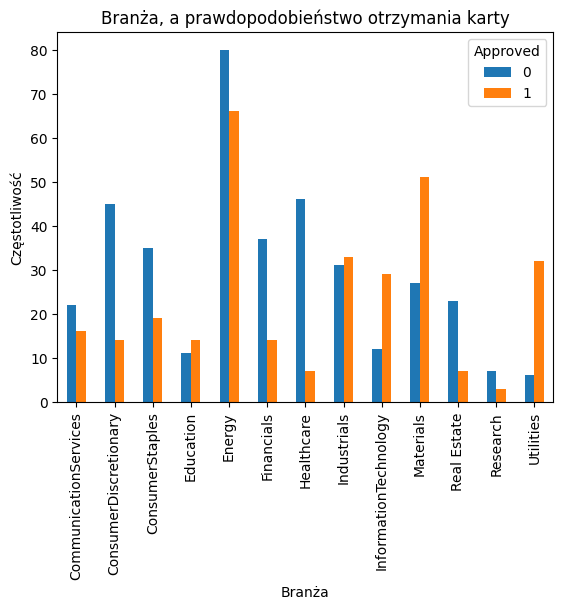

In [18]:
pd.crosstab(df4.Industry,df4.Approved).plot(kind='bar') 
plt.title('Branża, a prawdopodobieństwo otrzymania karty') 
plt.xlabel('Branża') 
plt.ylabel('Częstotliwość') 
plt.savefig('Industry_Approved')

- `Ethnicity`

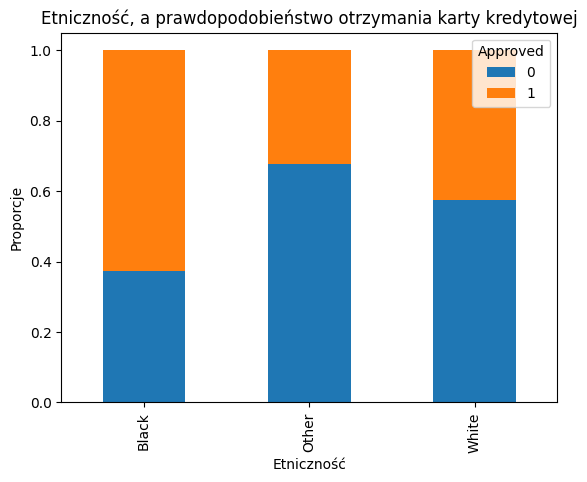

In [19]:
table=pd.crosstab(df4.Ethnicity,df4.Approved)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Etniczność, a prawdopodobieństwo otrzymania karty kredytowej')
plt.xlabel('Etniczność')
plt.ylabel('Proporcje')
plt.savefig('Ethnicity_Approved')

Z tego co widać na wykresach `Ethnicity` oraz `Industry` mogą być dobrymi predykatorami zmiennej wynikowej

Następnym krokiem będzie zakodowanie zmiennych kategorialnych

In [20]:
df4_tips = pd.get_dummies(df4)
df4_tips

,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,Income,Approved,...,Industry_Healthcare,Industry_Industrials,Industry_InformationTechnology,Industry_Materials,Industry_Real Estate,Industry_Research,Industry_Utilities,Ethnicity_Black,Ethnicity_Other,Ethnicity_White
0,30.83,0.000,1,1,1.25,1,1,1,0,1,...,0,1,0,0,0,0,0,0,0,1
1,58.67,4.460,1,1,3.04,1,1,6,560,1,...,0,0,0,1,0,0,0,1,0,0
2,24.50,0.500,1,1,1.50,1,0,0,824,1,...,0,0,0,1,0,0,0,1,0,0
3,27.83,1.540,1,1,3.75,1,1,5,3,1,...,0,1,0,0,0,0,0,0,0,1
4,20.17,5.625,1,1,1.71,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,21.08,10.085,0,0,1.25,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
686,22.67,0.750,1,1,2.00,0,1,2,394,0,...,0,0,0,0,0,0,0,0,0,1
687,25.25,13.500,0,0,2.00,0,1,1,1,0,...,1,0,0,0,0,0,0,0,1,0
688,17.92,0.205,1,1,0.04,0,0,0,750,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
from sklearn.preprocessing import OneHotEncoder
df4.keys()
df4_tips.keys()

Index(['Age', 'Debt', 'Married', 'BankCustomer', 'YearsEmployed',
       'PriorDefault', 'Employed', 'CreditScore', 'Income', 'Approved',
       'Industry_CommunicationServices', 'Industry_ConsumerDiscretionary',
       'Industry_ConsumerStaples', 'Industry_Education', 'Industry_Energy',
       'Industry_Financials', 'Industry_Healthcare', 'Industry_Industrials',
       'Industry_InformationTechnology', 'Industry_Materials',
       'Industry_Real Estate', 'Industry_Research', 'Industry_Utilities',
       'Ethnicity_Black', 'Ethnicity_Other', 'Ethnicity_White'],
      dtype='object')

In [22]:
one_encode = OneHotEncoder(sparse=False)
encode_arr = one_encode.fit_transform(df4[['Industry', 'Ethnicity']])
encode_arr

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [23]:
df4_second = pd.DataFrame(encode_arr, columns=['Industry_CommunicationServices', 'Industry_ConsumerDiscretionary',
       'Industry_ConsumerStaples', 'Industry_Education', 'Industry_Energy',
       'Industry_Financials', 'Industry_Healthcare', 'Industry_Industrials',
       'Industry_InformationTechnology', 'Industry_Materials',
       'Industry_Real Estate', 'Industry_Research', 'Industry_Utilities',
       'Ethnicity_Black', 'Ethnicity_Other', 'Ethnicity_White'])

In [24]:
first = ['Age', 'Debt', 'Married', 'BankCustomer', 'YearsEmployed',
       'PriorDefault', 'Employed', 'CreditScore', 'Income', 'Approved']
df4_first = df4[first]
df4_final = pd.concat([df4_second, df4_first], axis=1, join="inner")
df4_final



,Industry_CommunicationServices,Industry_ConsumerDiscretionary,Industry_ConsumerStaples,Industry_Education,Industry_Energy,Industry_Financials,Industry_Healthcare,Industry_Industrials,Industry_InformationTechnology,Industry_Materials,...,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,Income,Approved
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,30.83,0.000,1,1,1.250,1,1,1,0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,58.67,4.460,1,1,3.040,1,1,6,560,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,24.50,0.500,1,1,1.500,1,0,0,824,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,27.83,1.540,1,1,3.750,1,1,5,3,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,20.17,5.625,1,1,1.710,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17.08,3.290,1,1,0.335,0,0,0,2,0
683,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,36.42,0.750,0,0,0.585,0,0,0,3,0
684,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,40.58,3.290,1,1,3.500,0,0,0,0,0
685,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.08,10.085,0,0,1.250,0,0,0,0,0


# Metoda KNN

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

Na początku dzielimy zbiór na zbiór treningowy (80%) oraz testowy (20%). 

In [31]:
X = df4_final.iloc[:, 0:25].values
y = df4_final.iloc[:, 25].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Teraz należy sprawdzić zbalansowanie zbioru treningowego oraz testowego:

- treningowy

In [32]:
counter_train = collections.Counter(y_train)
counter_train

Counter({0: 305, 1: 242})

- testowy

In [33]:
counter_test = collections.Counter(y_test)
counter_test

Counter({0: 74, 1: 63})

Jak widać oba zbiory są dość dobrze zbalansowane, co oznacza, że zarówno w zbiorze treningowym jak i testowym jest podobna ilość pozytywnych i negatywnych decyzji dotyczących wydania karty kredytowej danej osobie.

Następnym krokiem jest standaryzacja oraz użycie metody KNN

- na początku k (ilość sąsiadów) = 3

In [34]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

y_predict = classifier.predict(X_test)

In [35]:
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[61 13]
 [15 48]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        74
           1       0.79      0.76      0.77        63

    accuracy                           0.80       137
   macro avg       0.79      0.79      0.79       137
weighted avg       0.80      0.80      0.80       137



Jak widać dokładność naszego modelu wynosi $0.80$, co nie jest złym wynikiem, ale dla porównania przyjmijmy jeszcze k = 5.

In [36]:
classifier2 = KNeighborsClassifier(n_neighbors=5)
classifier2.fit(X_train, y_train)

y_predict2 = classifier2.predict(X_test)

print(confusion_matrix(y_test, y_predict2))
print(classification_report(y_test, y_predict2))

[[65  9]
 [14 49]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        74
           1       0.84      0.78      0.81        63

    accuracy                           0.83       137
   macro avg       0.83      0.83      0.83       137
weighted avg       0.83      0.83      0.83       137



W tym przypadku można zobaczyć, że dokładność naszego modelu trochę się poprawiła ($0,83$), stało się to za sprawą tego, że liczba osób, która nie powinna otrzymać karty kredytowej, a która jednak ją dostała zmniejszyła się z $13$ na $9$. Natomiast liczba osób, która powinna dostać kartę kredytową, a która jednak jej nie dostała spadła z $15$ do $14$.

Na koniec sprawdzimy czy dla k = 10 precyzja modelu znów się obniży, czy może jednak okaże się, że model będzie jeszcze lepszy niż ten pierwszy

In [37]:
classifier3 = KNeighborsClassifier(n_neighbors=10)
classifier3.fit(X_train, y_train)

y_predict3 = classifier3.predict(X_test)

print(confusion_matrix(y_test, y_predict3))
print(classification_report(y_test, y_predict3))

[[66  8]
 [18 45]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84        74
           1       0.85      0.71      0.78        63

    accuracy                           0.81       137
   macro avg       0.82      0.80      0.81       137
weighted avg       0.81      0.81      0.81       137



W tym przypadku można zaobserwować, że dokładność naszego modelu jest gorsza niż w poprzednim przypadku ($k=5$), ale lepsza niż w pierwszym przypadku ($k=3$), ponieważ wynosi $0,81$, a stało się to ponieważ liczba osób, która nie powinna otrzymać karty kredytowej, a która jednak ją dostała spadła z $9$ do $8$, ale niestety liczba osób, które powinny dostać kartę, a jednak jej nie dostały wzrosła z $14$ do $18$.

# Regresja logistyczna

Przed wdrożeniem regresji logistycznej skalujemy zmienne naszego zbioru danych za pomocą metody `MinMaxScaler` z pakietu sklearn

In [38]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression 

In [39]:
scaler = MinMaxScaler(feature_range=(0,1))
rescaledXtrain = scaler.fit_transform(X_train)
rescaledXtest = scaler.fit_transform(X_test)

logreg = LogisticRegression()
logreg.fit(rescaledXtrain, y_train)

LogisticRegression()

In [40]:
y_pred = logreg.predict(rescaledXtest)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[62 12]
 [ 8 55]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86        74
           1       0.82      0.87      0.85        63

    accuracy                           0.85       137
   macro avg       0.85      0.86      0.85       137
weighted avg       0.86      0.85      0.85       137



W przypadku zastosowania regresji logistycznej precyzja wyniosła $0,85$, co jest jeszcze lepszym wynikiem niż w przypadku zastosowanej wcześniej metody KNN.

# Klasyfikator naiwny Bayesa

Na początku należy sprawdzić korelacje pomiędzy zmiennymi objaśniającymi. Zmienne te nie powinny być od siebie zależne, aby móc skorzystać z klasyfikatora naiwnego Bayesa

In [68]:
corr_bayes = df4.corr()
corr_bayes

,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,Income,Approved
Age,1.000000,0.201435,0.104743,0.097253,0.391294,0.203122,0.084912,0.186707,0.017827,0.162800
Debt,0.201435,1.000000,0.071984,0.081172,0.298728,0.242751,0.170472,0.267551,0.133530,0.204420
Married,0.104743,0.071984,1.000000,0.991989,0.067322,0.141505,0.173791,0.112490,-0.012321,0.177369
BankCustomer,0.097253,0.081172,0.991989,1.000000,0.073318,0.134930,0.168596,0.109585,0.053706,0.185796
YearsEmployed,0.391294,0.298728,0.067322,0.073318,1.000000,0.343347,0.223352,0.322254,0.041777,0.319698
PriorDefault,0.203122,0.242751,0.141505,0.134930,0.343347,1.000000,0.432118,0.379029,0.084165,0.719196
Employed,0.084912,0.170472,0.173791,0.168596,0.223352,0.432118,1.000000,0.570118,0.087328,0.458746
CreditScore,0.186707,0.267551,0.112490,0.109585,0.322254,0.379029,0.570118,1.000000,0.069898,0.406026
Income,0.017827,0.133530,-0.012321,0.053706,0.041777,0.084165,0.087328,0.069898,1.000000,0.170904
Approved,0.162800,0.204420,0.177369,0.185796,0.319698,0.719196,0.458746,0.406026,0.170904,1.000000


Można zaobserwować wysoką korelację między zmiennymi `Married` i `BankCustomer`, więc należy usunąć jedną z tych zmiennych, w tym przypadku będzie to `BankCustomer`

In [42]:
df5 = df4.drop(columns=['BankCustomer'])
df5.head()

,Age,Debt,Married,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Income,Approved
0,30.83,0.000,1,Industrials,White,1.25,1,1,1,0,1
1,58.67,4.460,1,Materials,Black,3.04,1,1,6,560,1
2,24.50,0.500,1,Materials,Black,1.50,1,0,0,824,1
3,27.83,1.540,1,Industrials,White,3.75,1,1,5,3,1
4,20.17,5.625,1,Industrials,White,1.71,1,0,0,0,1


Następnie należy sprawdzić rozkłady poszczególnych zmiennych.

<AxesSubplot: xlabel='CreditScore', ylabel='Count'>

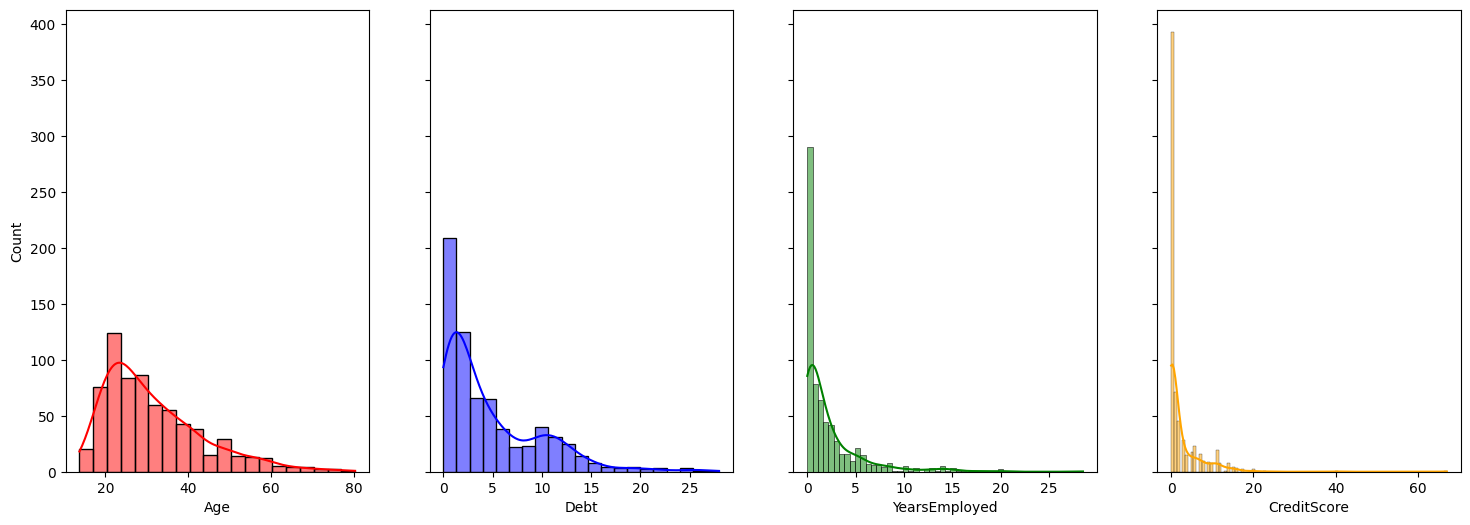

In [43]:
fig, axes = plt.subplots(1, 4, figsize=(18,6), sharey=True)
sns.histplot(df5, ax=axes[0], x='Age', kde=True, color='r')
sns.histplot(df5, ax=axes[1], x='Debt', kde=True, color='b')
sns.histplot(df5, ax=axes[2], x='YearsEmployed', kde=True, color='g')
sns.histplot(df5, ax=axes[3], x='CreditScore', kde=True, color='orange')

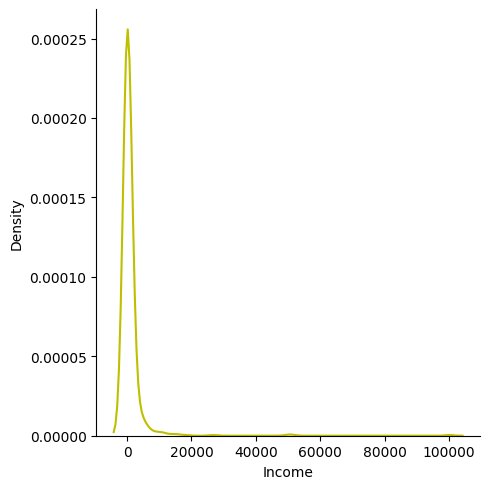

In [44]:
sns.displot(df5, x='Income', kind="kde", color='y')

Jak widzimy zmienne te nie mają rozkładu normalnego, w związku z tym musimy przeprowadzić ich dekretyzację , wiek dzielimy przy wartościach 30,50, dług, zdolność kredytowa oraz okres zatrudnienia przy wartościach 5,10  a przychód przy wartościach 35000,70000 $. Doboru wartości dokonaliśmy dzięki ocenie kształtu wykresów gęstości oraz realnym znaczeniu tych wartości.

In [45]:
df5['Age'] = pd.cut(df5.Age, bins = [-999999,30,50,np.Inf], labels = ['low', 'medium', 'high'])
df5['Debt'] = pd.cut(df5.Debt, bins = [-999999,5,10,np.Inf], labels = ['low', 'medium', 'high'])
df5['YearsEmployed'] = pd.cut(df5.YearsEmployed, bins = [-999999,5,10,np.Inf], labels = ['low', 'medium', 'high'])
df5['CreditScore'] = pd.cut(df5.CreditScore, bins = [-999999,5,10,np.Inf], labels = ['low', 'medium', 'high'])
df5['Income'] = pd.cut(df5.Income, bins = [-999999,35000,70000,np.Inf], labels = ['low', 'medium', 'high'])



In [46]:
df5.head()


,Age,Debt,Married,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Income,Approved
0,medium,low,1,Industrials,White,low,1,1,low,low,1
1,high,low,1,Materials,Black,low,1,1,medium,low,1
2,low,low,1,Materials,Black,low,1,0,low,low,1
3,low,low,1,Industrials,White,low,1,1,low,low,1
4,low,medium,1,Industrials,White,low,1,0,low,low,1


Aby móc przekazać nasze dane do funkcji 

*   Element listy
*   Element listy

klasyfikatora naiwnego Bayesa musimy przepuścic kolumny z danymi kategorycznymi przez One-Hot Encoding

In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
df5_enc = df5.drop(columns=["Married","PriorDefault","Employed","Approved"])
df5_dummies = pd.get_dummies(df5_enc, columns=["Age","Debt","Industry","Ethnicity","YearsEmployed","CreditScore","Income"])
df5_dummies.head()

,Age_low,Age_medium,Age_high,Debt_low,Debt_medium,Debt_high,Industry_CommunicationServices,Industry_ConsumerDiscretionary,Industry_ConsumerStaples,Industry_Education,...,Ethnicity_White,YearsEmployed_low,YearsEmployed_medium,YearsEmployed_high,CreditScore_low,CreditScore_medium,CreditScore_high,Income_low,Income_medium,Income_high
0,0,1,0,1,0,0,0,0,0,0,...,1,1,0,0,1,0,0,1,0,0
1,0,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
3,1,0,0,1,0,0,0,0,0,0,...,1,1,0,0,1,0,0,1,0,0
4,1,0,0,0,1,0,0,0,0,0,...,1,1,0,0,1,0,0,1,0,0


In [48]:
df6=df5.drop(columns=["Age","Debt","Industry","Ethnicity","YearsEmployed","CreditScore","Income"])
df6_merged = df6.join(df5_dummies)

Po zamianie wszystkich zmiennych na zmienne liczbowe jesteśmy w stanie podstawić je do naszej funkcji, przechodzimy do podzielenia df na zbiór uczący i testowy, a następnie wykonujemy metodę klasyfikatora naiwnego bayesa.

In [49]:
Y1 = df6_merged["Approved"]
X1 = df6_merged.drop(columns=["Approved"])
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.20)

In [50]:
clf = GaussianNB()
clf.fit(X_train, Y_train)
GaussianNB()
test_pred = clf.predict(X_test)
print(test_pred)

[1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1]


Powyżej mamy przedstawiony finalny wynik predykcji modelu
Teraz przechodzimy do analizy wyników: 

In [51]:
print(confusion_matrix(Y_test, test_pred))
print(classification_report(Y_test, test_pred))

[[72  3]
 [31 32]]
              precision    recall  f1-score   support

           0       0.70      0.96      0.81        75
           1       0.91      0.51      0.65        63

    accuracy                           0.75       138
   macro avg       0.81      0.73      0.73       138
weighted avg       0.80      0.75      0.74       138



Jak widzimy mamy wartości o liczności : true positive 72 , false positive 3 , false negative 31, true negative 32. Model zdecydowanie lepiej radzi sobie z określaniem wartości pozytywnych, może to wynikać ze zwiększenia poczatkowej ilości zmiennych objaśniających z 11 na 36, było to niestety konieczne aby móc zastosować funkcję z klasyfikatorem naiwnym bayesa. 

Jak widzimy czułość naszego szacunku wynosi jedynie 0.70 , precyzja natomiast wynosi natomiast aż 0.96, jest to dobry wynik jednak z uwagi na czułość widzimy, że model jest lekko zakłamany.
W związku z tym użyjemy innej funkcji, która dostosowuje parametr threshold - próg klasyfikacji.

In [52]:
clf = BernoulliNB()
clf.fit(X_train, Y_train)
BernoulliNB()
test_pred = clf.predict(X_test)
print(confusion_matrix(Y_test, test_pred))
print(classification_report(Y_test, test_pred))

[[66  9]
 [13 50]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        75
           1       0.85      0.79      0.82        63

    accuracy                           0.84       138
   macro avg       0.84      0.84      0.84       138
weighted avg       0.84      0.84      0.84       138



Od razu widzimy poprawę czułości modelu do 0.84

# Liniowa analiza dyskryminacyjna

LDA to metoda geometryczna, posiada ona swoją funkcję w bibliotece skit learn, dane wykorzystane w tej metodzie mogą mieć zarówno charakter kategoryczny jak i ilościowy. Decyduję się na użycie danych z dataframe df4.



In [53]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [69]:
corr_LDA = df4.corr()
corr_LDA

,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,Income,Approved
Age,1.000000,0.201435,0.104743,0.097253,0.391294,0.203122,0.084912,0.186707,0.017827,0.162800
Debt,0.201435,1.000000,0.071984,0.081172,0.298728,0.242751,0.170472,0.267551,0.133530,0.204420
Married,0.104743,0.071984,1.000000,0.991989,0.067322,0.141505,0.173791,0.112490,-0.012321,0.177369
BankCustomer,0.097253,0.081172,0.991989,1.000000,0.073318,0.134930,0.168596,0.109585,0.053706,0.185796
YearsEmployed,0.391294,0.298728,0.067322,0.073318,1.000000,0.343347,0.223352,0.322254,0.041777,0.319698
PriorDefault,0.203122,0.242751,0.141505,0.134930,0.343347,1.000000,0.432118,0.379029,0.084165,0.719196
Employed,0.084912,0.170472,0.173791,0.168596,0.223352,0.432118,1.000000,0.570118,0.087328,0.458746
CreditScore,0.186707,0.267551,0.112490,0.109585,0.322254,0.379029,0.570118,1.000000,0.069898,0.406026
Income,0.017827,0.133530,-0.012321,0.053706,0.041777,0.084165,0.087328,0.069898,1.000000,0.170904
Approved,0.162800,0.204420,0.177369,0.185796,0.319698,0.719196,0.458746,0.406026,0.170904,1.000000


Można zaobserwować wysoką korelację między zmiennymi `Married` i `BankCustomer`, więc należy usunąć jedną z tych zmiennych, w tym przypadku będzie to `BankCustomer`

In [55]:
df5 = df4.drop(columns=['BankCustomer'])
df5.head()

,Age,Debt,Married,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Income,Approved
0,30.83,0.000,1,Industrials,White,1.25,1,1,1,0,1
1,58.67,4.460,1,Materials,Black,3.04,1,1,6,560,1
2,24.50,0.500,1,Materials,Black,1.50,1,0,0,824,1
3,27.83,1.540,1,Industrials,White,3.75,1,1,5,3,1
4,20.17,5.625,1,Industrials,White,1.71,1,0,0,0,1


Dokonujemy takich samych operacji na df jak w przypadku bayesa (mimo, że z matematycznego punktu widzenia możemy posiadać zmienne kategoryczne to funkcja w pythonie nie będzie w stanie ich przyjąć, z uwagi na to musimy je pogrupować i zastosowac one-hot encoding, tym samym zwiększając ilość kolumn), zanim jednak zastosujemy o-h encoding sprawdzimy zależności między zmiennymi które zostaną zmiennymi ilościowymi.

In [56]:
df5['Age'] = pd.cut(df5.Age, bins = [-999999,30,50,np.Inf], labels = ['low', 'medium', 'high'])
df5['Debt'] = pd.cut(df5.Debt, bins = [-999999,5,10,np.Inf], labels = ['low', 'medium', 'high'])
df5['YearsEmployed'] = pd.cut(df5.YearsEmployed, bins = [-999999,5,10,np.Inf], labels = ['low', 'medium', 'high'])
df5['CreditScore'] = pd.cut(df5.CreditScore, bins = [-999999,5,10,np.Inf], labels = ['low', 'medium', 'high'])
df5['Income'] = pd.cut(df5.Income, bins = [-999999,35000,70000,np.Inf], labels = ['low', 'medium', 'high'])
df5.head()

,Age,Debt,Married,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Income,Approved
0,medium,low,1,Industrials,White,low,1,1,low,low,1
1,high,low,1,Materials,Black,low,1,1,medium,low,1
2,low,low,1,Materials,Black,low,1,0,low,low,1
3,low,low,1,Industrials,White,low,1,1,low,low,1
4,low,medium,1,Industrials,White,low,1,0,low,low,1


In [70]:
df5_x = df5.drop(columns=['Approved'])
df5_x.cov()

,Married,PriorDefault,Employed
Married,0.181997,0.030175,0.036711
PriorDefault,0.030175,0.249855,0.106949
Employed,0.036711,0.106949,0.245165


Macierz kowariancji ma niskie wartości, oznacza to, że między zmiennymi istnieje znikoma korelacja liniowa

Teraz sprawdzimy występowanie wartości odstających

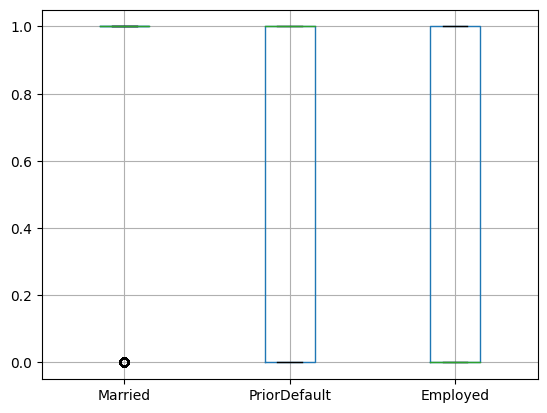

In [58]:
boxplot = df5_x.boxplot(column=['Married', 'PriorDefault', 'Employed']) 

Wszystkie nasze dane są względnie równe, przyjmują wartości od 0 do 1, nie mamy tutaj problemu z tym zbiorem danych. Możemy przejść do enkodowania oraz obliczania funkcji LDA

In [59]:
df5_enc = df5.drop(columns=["Married","PriorDefault","Employed","Approved"])
df5_dummies = pd.get_dummies(df5_enc, columns=["Age","Debt","Industry","Ethnicity","YearsEmployed","CreditScore","Income"])
df5_dummies.head()

,Age_low,Age_medium,Age_high,Debt_low,Debt_medium,Debt_high,Industry_CommunicationServices,Industry_ConsumerDiscretionary,Industry_ConsumerStaples,Industry_Education,...,Ethnicity_White,YearsEmployed_low,YearsEmployed_medium,YearsEmployed_high,CreditScore_low,CreditScore_medium,CreditScore_high,Income_low,Income_medium,Income_high
0,0,1,0,1,0,0,0,0,0,0,...,1,1,0,0,1,0,0,1,0,0
1,0,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
3,1,0,0,1,0,0,0,0,0,0,...,1,1,0,0,1,0,0,1,0,0
4,1,0,0,0,1,0,0,0,0,0,...,1,1,0,0,1,0,0,1,0,0


In [60]:
df6=df5.drop(columns=["Age","Debt","Industry","Ethnicity","YearsEmployed","CreditScore","Income"])
df6_merged = df6.join(df5_dummies)

In [61]:
Y1 = df6_merged['Approved']
X1 = df6_merged.drop(columns=['Approved'])
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.20)

In [62]:
clf = LDA()
clf.fit(X_train,Y_train)
LDA(n_components=None, priors=None, shrinkage=None, solver='svd',
  store_covariance=False, tol=0.0001)
test_pred = clf.predict(X_test)
print(test_pred)

[0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0
 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1
 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 1
 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0]


Po dokonaniu klasyfikacji możemy przejść do wyświetlenia macierzy błędów oraz interpretacji wyników

In [63]:
print(confusion_matrix(Y_test,test_pred))
print(classification_report(Y_test,test_pred))

[[63  8]
 [ 8 59]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        71
           1       0.88      0.88      0.88        67

    accuracy                           0.88       138
   macro avg       0.88      0.88      0.88       138
weighted avg       0.88      0.88      0.88       138



Jak widzimy wartości true positive mamy 63, false positive 15, false negative 8, true negative 59. Model bardzo dobrze radzi sobie z określaniem wartości negatywnych, a z wartościami pozytywnymi radzi sobie dość dobrze. Zarówno czułość jak i precyzja naszego modelu jest na poziomie 0.89, są to bardzo dobre wyniki.